In [98]:
#import packages 
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import fuzzywuzzy
import seaborn as sns
import plotly.graph_objects as go

In [99]:
paalData = pd.read_csv('laadpaaldata.csv')
paalData.head()

,Started,Ended,TotalEnergy,ConnectedTime,ChargeTime,MaxPower
0,2018-01-01 08:45:26,2018-01-01 09:16:45,1830,0.5219,0.5219,3524
1,2018-01-01 11:26:40,2018-01-01 14:36:13,28641,3.1592,2.3056,13680
2,2018-01-01 12:39:28,2018-01-01 20:58:10,65534,8.3117,8.3117,11200
3,2018-01-01 14:26:58,2018-01-02 06:36:55,10080,16.1658,4.3006,3360
4,2018-01-01 14:50:05,2018-01-01 17:21:50,7180,2.5292,2.0656,3758


In [100]:
paalData.shape

(10188, 6)

In [101]:
paalData.isna().sum()

Started          0
Ended            0
TotalEnergy      0
ConnectedTime    0
ChargeTime       0
MaxPower         0
dtype: int64

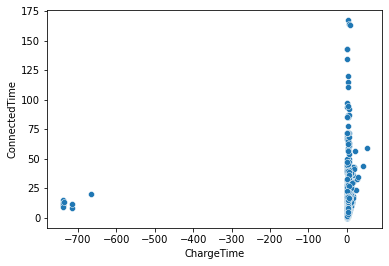

In [102]:
plt.figure()
sns.scatterplot(x='ChargeTime',y='ConnectedTime',data=paalData)
plt.show()

In [103]:
fout1 = paalData[paalData['ChargeTime'] < 0]
print(fout1)
fout1.shape

                  Started                Ended  TotalEnergy  ConnectedTime  \
941   2018-01-31 19:48:14  2018-02-01 06:30:30        10930        10.7044   
942   2018-01-31 20:14:09  2018-02-01 11:15:45         9152        15.0267   
1724  2018-02-28 17:28:20  2018-03-01 14:02:02        18876        20.5617   
3480  2018-04-30 22:55:49  2018-05-01 07:41:45         9740         8.7656   
4270  2018-05-31 19:43:03  2018-06-01 06:59:43        36570        11.2778   
4271  2018-05-31 20:14:40  2018-06-01 07:11:07        35750        10.9408   
5079  2018-06-30 21:50:30  2018-07-01 09:43:00        55540        11.8750   
5792  2018-07-31 18:50:37  2018-08-01 07:43:16        60860        12.8775   
5795  2018-07-31 21:09:01  2018-08-01 06:41:10        12182         9.5358   
8316  2018-10-31 18:32:04  2018-11-01 08:08:22        68440        13.6050   

      ChargeTime  MaxPower  
941     -738.796      3240  
942     -739.989      3230  
1724    -665.250      3256  
3480    -716.180      336

(10, 6)

In [104]:
#Filter paalData outliers
paalData = paalData[paalData['ChargeTime'] > 0]
paalData = paalData[paalData['ChargeTime'] < 10]

In [105]:
#Voeg kolom toe voor ConnectedTime en ChargeTime in minuten: ConnectedTimeMin, ChargeTimeMin
paalData['ConnectedTimeMin'] = paalData['ConnectedTime'] * 60
paalData['ChargeTimeMin'] = paalData['ChargeTime'] * 60

#Kolom met totaal verbruikt vermogen toevoegen: VermogenTotaal (in W)
paalData['VermogenTotaal'] = paalData['TotalEnergy'] / paalData['ChargeTime']
#Filter outlier
paalData = paalData[paalData['VermogenTotaal'] < 20000]

paalData.head()

,Started,Ended,TotalEnergy,ConnectedTime,ChargeTime,MaxPower,ConnectedTimeMin,ChargeTimeMin,VermogenTotaal
0,2018-01-01 08:45:26,2018-01-01 09:16:45,1830,0.5219,0.5219,3524,31.314,31.314,3506.418854
1,2018-01-01 11:26:40,2018-01-01 14:36:13,28641,3.1592,2.3056,13680,189.552,138.336,12422.362942
2,2018-01-01 12:39:28,2018-01-01 20:58:10,65534,8.3117,8.3117,11200,498.702,498.702,7884.548287
3,2018-01-01 14:26:58,2018-01-02 06:36:55,10080,16.1658,4.3006,3360,969.948,258.036,2343.858996
4,2018-01-01 14:50:05,2018-01-01 17:21:50,7180,2.5292,2.0656,3758,151.752,123.936,3475.987607


In [106]:
#Data van een gemiddelde bezetting van een laadpaal
paalData.mean()

TotalEnergy         9378.059362
ConnectedTime          6.256658
ChargeTime             2.441022
MaxPower            4124.526201
ConnectedTimeMin     375.399482
ChargeTimeMin        146.461325
VermogenTotaal      3609.881969
dtype: float64